In [1]:
# 糖尿病患者の分類を行ってみる

import pandas as pd

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()


--2023-03-08 22:19:48--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-08 22:19:48--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: 'diabetes.csv'

diabetes.csv        100%[===================>] 758.22K  --.-KB/s    in 0.08s   

2023-03-08 22:19:48 (8.92 MB/s) - 'diabetes.csv' saved [776415/776415]

FINISHED --2023-03-08 22:19:48--
Total wall clock time: 0.5s
Downloaded: 1 files, 758K in 0.08s (8.92 MB/s)


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


In [3]:
# 特徴をX, ラベルをyとして分離する
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


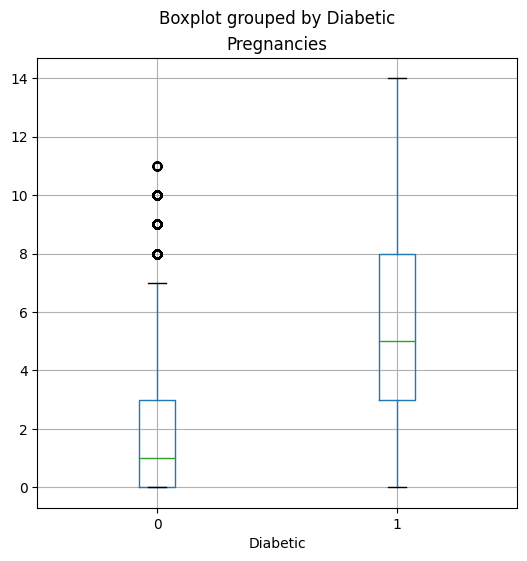

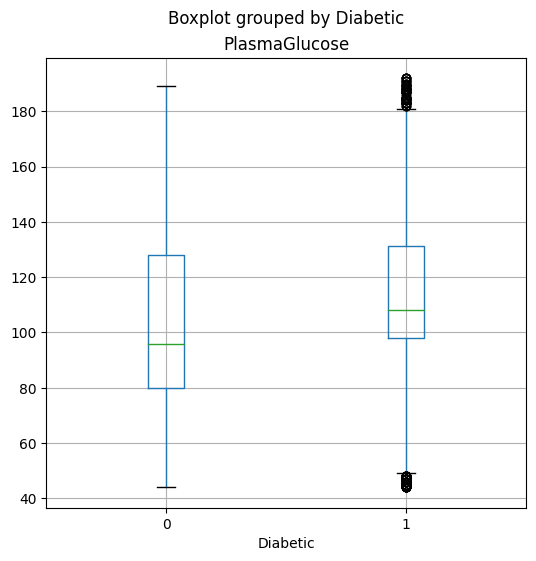

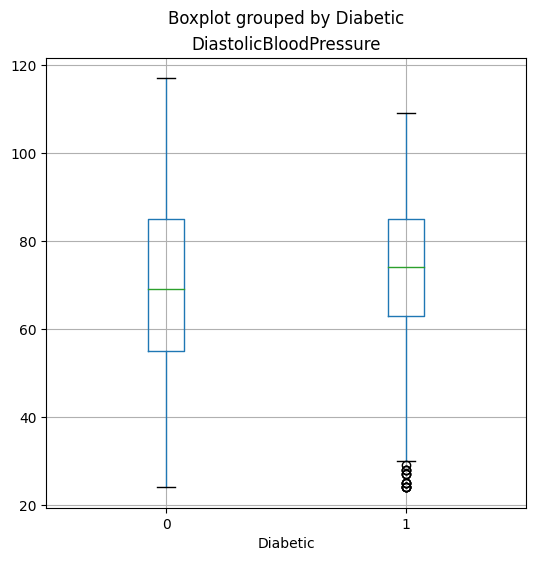

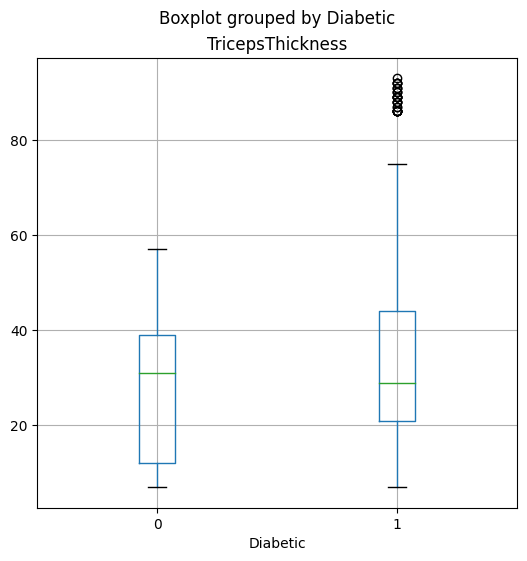

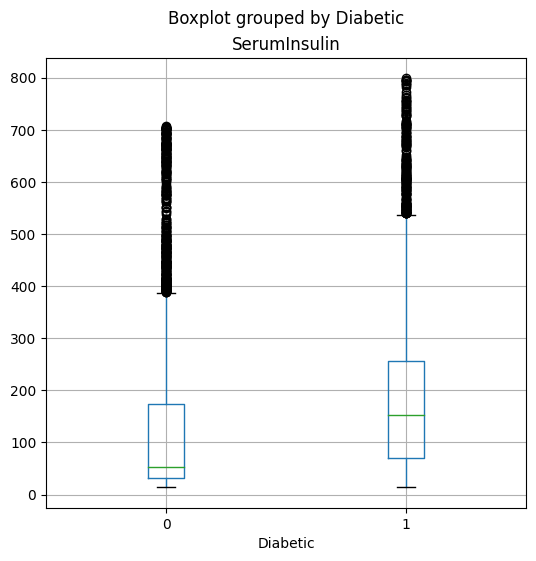

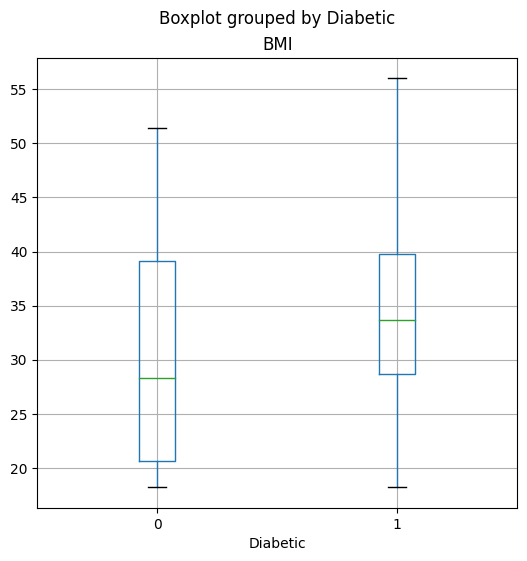

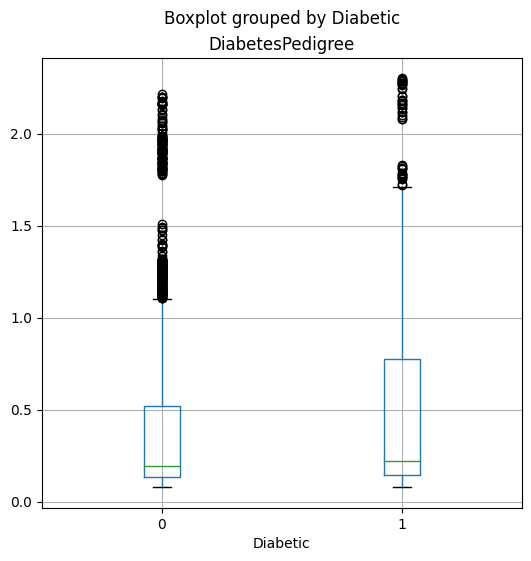

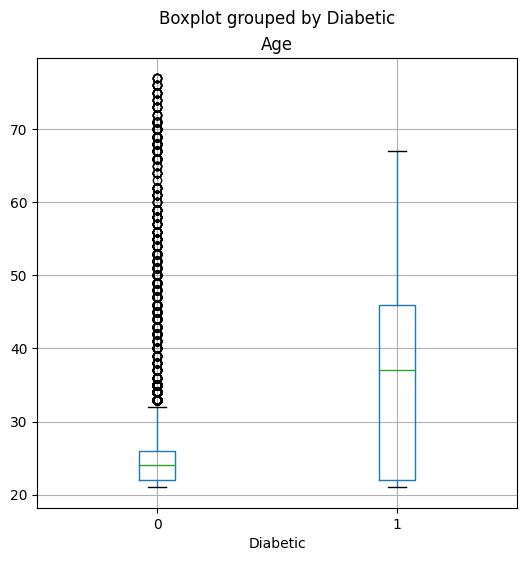

In [4]:
# 分布を比較する

from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

In [5]:
# トレーニング用にでーたを分つする

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Training cases: %d\nTest cases: %d' %
      (X_train.shape[0], X_test.shape[0]))


Training cases: 10500
Test cases: 4500


In [6]:
# ロジスティック回帰でもデルをトレーニングする。
# トレーニング前に正則化パラメタを設定する。過学習を防ぐ

from sklearn.linear_model import LogisticRegression

reg = 0.01

model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [7]:
# 予測する
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [8]:
# モデルの精度を検証する

from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions
))

Accuracy:  0.7891111111111111


## 分類指標

精度は陽の値がごく少ない時（稀な感染症など）では効果を発揮しない。他のメトリクスを用いて検証する必要がある。



In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))


--2023-03-08 22:53:15--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: 'diabetes.csv.1'

diabetes.csv.1      100%[===================>] 758.22K  --.-KB/s    in 0.08s   

2023-03-08 22:53:15 (8.88 MB/s) - 'diabetes.csv.1' saved [776415/776415]

Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]
Accuracy:  0.7891111111111111


In [10]:
# 他の分類レポートを確認する

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



- ・正解率(Accuracy)：内容に関わらず正しい
- ・適合率（Precision）：予測が陽のうち、真のもの
- ・再現率（Recall）：正しい推論のうち、真のもの
- ・F値（F-measure）：適合率と再現率の調和平均

In [11]:
# 以下のようにしても取得できる

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7240285487708168
Overall Recall: 0.6030383091149274


In [12]:
# 混同行列を作成する

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


[[2638  348]
 [ 601  913]]


In [13]:
# 分類の各確率を確認できる
y_scores = model.predict_proba(X_test)
print(y_scores)


[[0.8164529  0.1835471 ]
 [0.96268734 0.03731266]
 [0.8079534  0.1920466 ]
 ...
 [0.60667181 0.39332819]
 [0.10802414 0.89197586]
 [0.63984848 0.36015152]]


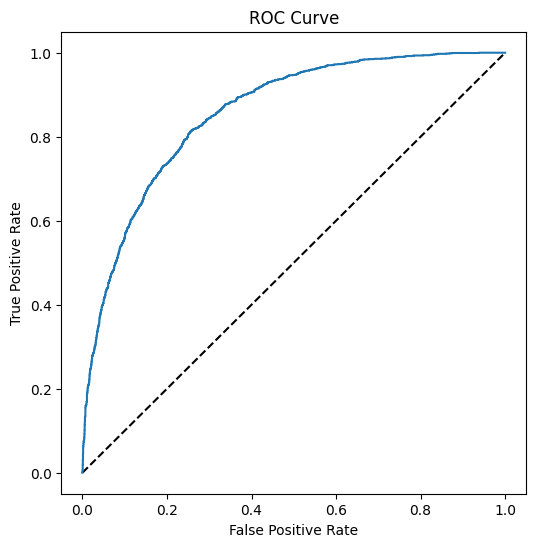

In [14]:
# ROC曲線をプロットする
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [15]:
# AUC(面積)を計算する
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:, 1])
print('AUC: ' + str(auc))


AUC: 0.8568610804626786


In [22]:
# SKlearnのパイプライン機能で、前処理とアルゴリズムをカプセル化する

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# 数値カラムに対しての前処理
numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[('scalar', StandardScaler())])

# カテゴリかる変数
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# 前処理の結合
preprocessor = ColumnTransformer(
    transformers=[
      ('num', numeric_transformer, numeric_features),
      ('cat', categorical_transformer, categorical_features)
    ]
)

# 前処理とトレーニングのパイプライン
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver='liblinear'))])

# ロジスティック回帰にてトレーニング
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337693


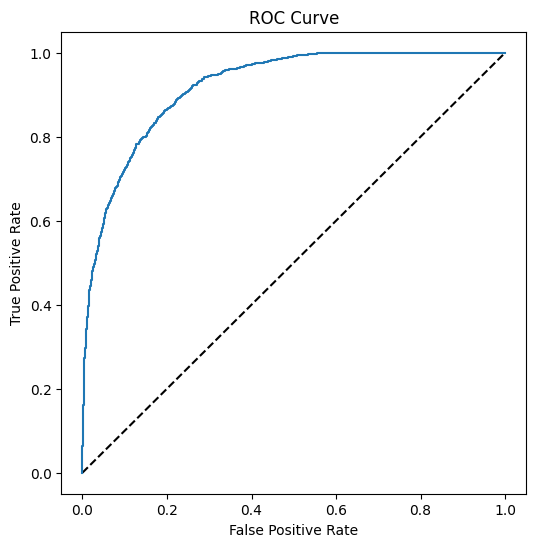

In [23]:
# テストデータから予測を取得
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# 評価指標を取得する
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_scores[:, 1])
print('AUC: ' + str(auc))

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [24]:
# ランダムフォレストを用いて推定する
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('logregressor', RandomForestClassifier(n_estimators=100))])

model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2857  129]
 [ 180 1334]] 

Accuracy: 0.9313333333333333
Overall Precision: 0.911825017088175
Overall Recall: 0.8811096433289299

AUC: 0.9825433706039899


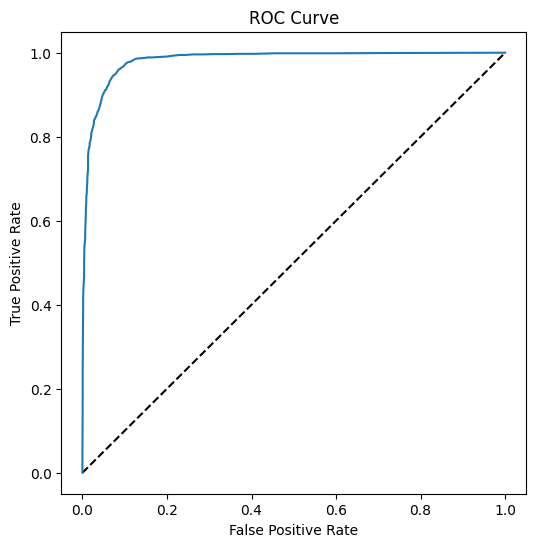

In [25]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_scores[:, 1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [27]:
# モデルを保存する
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)


['./diabetes_model.pkl']

In [28]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2, 180, 74, 24, 21, 23.9091702, 1.488172308, 22]])
print('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))


New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## マルチクラスの分類問題

### 1対多（OVR）

- AかA以外
- BかB以外
- CかC以外
- DかD以外

### 1対1（OVO）
- AまたはB
- AまたはC
- AまたはD
- BまたはC
- BまたはD
- CまたはD


## 2値分類との関わり

- 2値よりはシンプルである
- 多くの2値分類はOVO,OVRを継承している


> **Citation**: The penguins dataset used in the this exercise is a subset of data collected and made available by [Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

In [29]:
# 3 種類のペンギンの観察結果を含むデータセットを使用します。
# 
import pandas as pd

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample


--2023-03-08 23:30:26--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-08 23:30:26--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: 'penguins.csv'

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0s      

2023-03-08 23:30:26 (29.6 MB/s) - 'penguins.csv' saved [7086/7086]

FINISHED --2023-03-08 23:30:26--
Total wall clock time: 0.4s
Downloaded: 1 files, 6.9K in 0s (29.6 MB/s)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
182,47.3,15.3,222.0,5250.0,1
310,49.7,18.6,195.0,3600.0,2
33,40.9,18.9,184.0,3900.0,0
164,45.5,13.7,214.0,4650.0,1
69,41.8,19.4,198.0,4450.0,0
180,48.2,14.3,210.0,4600.0,1
336,51.9,19.5,206.0,3950.0,2
10,37.8,17.1,186.0,3300.0,0
1,39.5,17.4,186.0,3800.0,0
37,42.2,18.5,180.0,3550.0,0


CulmenLength : ペンギンの翅 (くちばし) の長さ (mm)。  
CulmenDepth : ペンギンの睾丸の深さ (mm)。  
FlipperLength : ペンギンの足ひれの mm 単位の長さ。  
BodyMass : ペンギンの体重 (グラム単位)。  
Species : ペンギンの種を表す整数値。  


In [30]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 41.1 18.6 189.0 3325.0 0 ] Adelie
[ 46.4 15.0 216.0 4700.0 1 ] Gentoo
[ 42.9 13.1 215.0 5000.0 1 ] Gentoo
[ 45.3 13.8 208.0 4200.0 1 ] Gentoo
[ 38.6 21.2 191.0 3800.0 0 ] Adelie
[ 50.0 15.9 224.0 5350.0 1 ] Gentoo
[ 40.6 18.6 183.0 3550.0 0 ] Adelie
[ 43.5 15.2 213.0 4650.0 1 ] Gentoo
[ 35.0 17.9 192.0 3725.0 0 ] Adelie
[ 46.1 15.1 215.0 5100.0 1 ] Gentoo


In [34]:
# 欠損値確認
print(penguins.isnull().sum())
penguins[penguins.isnull().any(axis=1)]


CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [36]:
penguins = penguins.dropna()
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

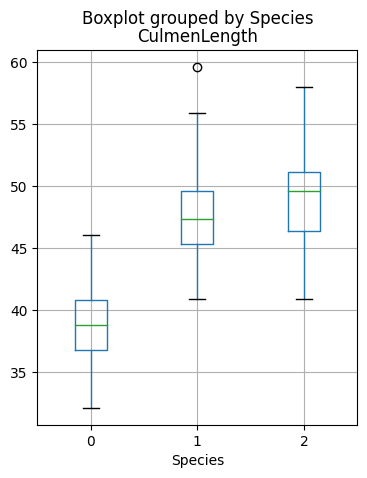

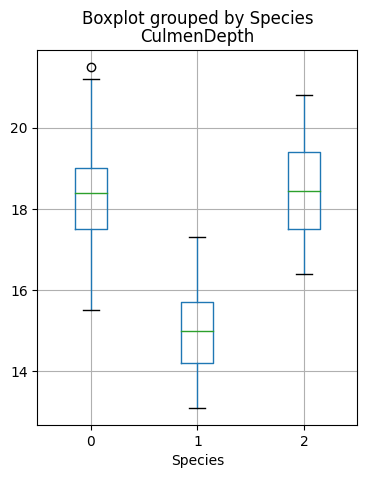

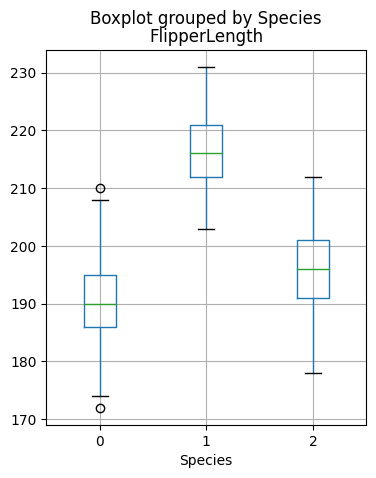

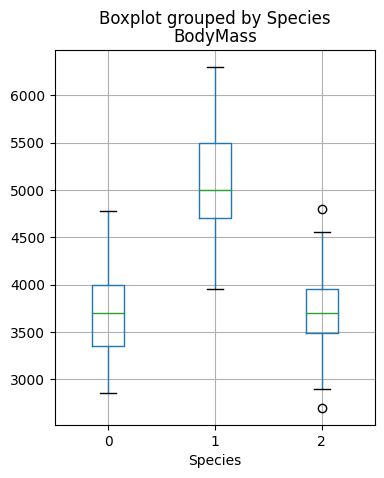

In [38]:
# boxplot
from matplotlib import pyplot as plt
%matplotlib inline

penguins_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguins_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(4,5))
    plt.title(col)
plt.show()

In [49]:
# データ分割

from sklearn.model_selection import train_test_split

# 目的説明分割
penguins_X, penguind_y = penguins[penguins_features].values, penguins[penguin_label].values

# 70/30で分割
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguind_y,
                                                                                     test_size=0.3,
                                                                                     random_state=0,
                                                                                     stratify=penguind_y)

In [50]:
# ロジスティック回帰で分類する

from sklearn.linear_model import LogisticRegression

reg = 0.1

multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print(multi_model)


LogisticRegression(C=10.0, max_iter=10000)


In [51]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [52]:
# 全体的な指標をみる
from sklearn.metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [53]:
# 個別にみる

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [55]:
# 混同行列
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)


[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


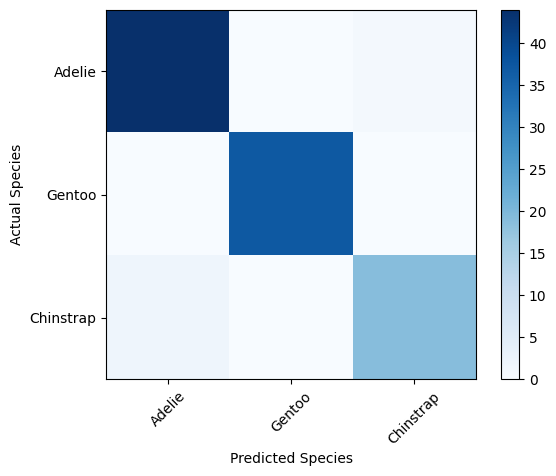

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()


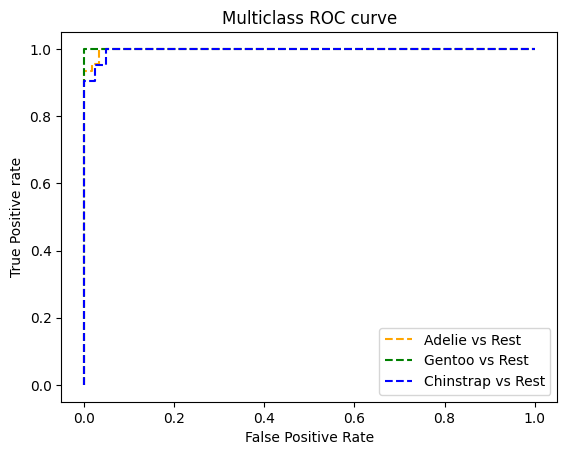

In [57]:
# マルチクラスの場合はROC曲線を書くことはできない。
# ただしOVR(1対多)であれば描ける

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(
        y_penguin_test, penguin_prob[:, i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange',
         label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green',
         label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue',
         label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [58]:
# 平均
auc = roc_auc_score(y_penguin_test, penguin_prob, multi_class='ovr')
print('Average AUC:', auc)


Average AUC: 0.9981999902100828


In [64]:
# パイプライン化する

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# 数値からむ
feature_columns = [0, 1, 2, 3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# preprocess pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])

# train pipeline
pipline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVC(probability=True))
])

multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


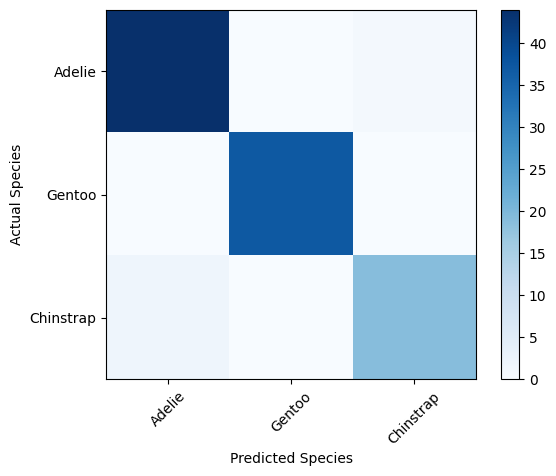

In [65]:
# 新しいモデルのひょうk

# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:", accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:", precision_score(
    y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:", recall_score(
    y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(
    y_penguin_test, penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()


In [66]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)


['./penguin_model.pkl']

In [67]:
## 予測するぜ

# モデルの読み込み
multi_model = joblib.load(filename)

x_new = np.array([[50.4, 15.3, 224, 5550]])
print('New sample: {}'.format(x_new[0]))

penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])


New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [68]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)
